In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# CDC, KCDC load

CDC = pd.read_csv('./data/ILINet_CDC.csv', index_col=0)
KCDC = pd.read_csv('./data/influenza_KCDC.csv', index_col=0)
ASPREN = pd.read_csv('./data/ASPREN_AU.csv', index_col=0)

In [3]:
# CDC, KCDC normalization

# CDC

CDC_norm = pd.concat([s for c, s in CDC.items()], ignore_index=True)
CDC_norm = CDC_norm.dropna().values.reshape(-1,1)

CDC_scaler = MinMaxScaler()
# with open('./data/v2/CDC_scaler.pkl', 'rb') as f:
#     CDC_scaler = pickle.load(f)
CDC_scaler.fit(CDC_norm)
CDC_norm = np.array([CDC_scaler.transform(np.expand_dims(l, axis=1)).reshape(-1) for l in CDC.values])
CDC_norm = pd.DataFrame(CDC_norm, 
                         columns=CDC.columns,
                         index=CDC.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
CDC_norm.loc[53, CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1]] = (
    (CDC_norm.loc[52, CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1]].values +
    CDC_norm[[str(y) for y in np.int64(CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/CDC_scaler.pkl', 'wb') as f:
#     pickle.dump(CDC_scaler, f)
    
# KCDC

KCDC_norm = pd.concat([s for c, s in KCDC.items()], ignore_index=True)
KCDC_norm = KCDC_norm.dropna().values.reshape(-1,1)

KCDC_scaler = MinMaxScaler()
# with open('./data/v2/KCDC_scaler.pkl', 'rb') as f:
#     KCDC_scaler = pickle.load(f)
KCDC_scaler.fit(KCDC_norm)
KCDC_norm = np.array([KCDC_scaler.transform(np.expand_dims(l, axis=1)).reshape(-1) for l in KCDC.values])
KCDC_norm = pd.DataFrame(KCDC_norm, 
                         columns=KCDC.columns,
                         index=KCDC.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
KCDC_norm.loc[53, KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1]] = (
    (KCDC_norm.loc[52, KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1]].values +
    KCDC_norm[[str(y) for y in np.int64(KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/KCDC_scaler.pkl', 'wb') as f:
#     pickle.dump(KCDC_scaler, f)

# ASPREN

ASPREN_norm = pd.concat([s for c, s in ASPREN.items()], ignore_index=True)
ASPREN_norm = ASPREN_norm.dropna().values.reshape(-1,1)

ASPREN_scaler = MinMaxScaler()
# with open('./data/v2/ASPREN_scaler.pkl', 'rb') as f:
#     ASPREN_scaler = pickle.load(f)
ASPREN_scaler.fit(ASPREN_norm)
ASPREN_norm = np.array([ASPREN_scaler.transform(np.expand_dims(l, axis=1)).reshape(-1) for l in ASPREN.values])
ASPREN_norm = pd.DataFrame(ASPREN_norm, 
                         columns=ASPREN.columns,
                         index=ASPREN.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
ASPREN_norm.loc[53, ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1]] = (
    (ASPREN_norm.loc[52, ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1]].values +
    ASPREN_norm[[str(y) for y in np.int64(ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/ASPREN_scaler.pkl', 'wb') as f:
#     pickle.dump(ASPREN_scaler, f)

In [4]:
# US, KR related words by word2vec

with open('./data/v2/US_related_1000.pkl', 'rb') as f:
    US_related_words = pickle.load(f)
with open('./data/v2/KR_related_1000.pkl', 'rb') as f:
    KR_related_words = pickle.load(f)

In [5]:
# US trends, KR News/SNS/Trends load

US_trends = pd.read_csv('./data/v2/US_trends.csv', index_col=0)
AU_trends = pd.read_csv('./data/v2/AU_trends.csv', index_col=0)

KR_news = pd.read_csv('./data/v2/KR_news.csv', index_col=0)
KR_sns = pd.read_csv('./data/v2/KR_sns.csv', index_col=0)
KR_trends = pd.read_csv('./data/v2/KR_trends.csv', index_col=0)

In [6]:
# normalization

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(US_trends[[c for c in US_trends.columns if c != 'weeks']])
US_trends_norm = pd.DataFrame(minmax_scaler.transform(US_trends[[c for c in US_trends.columns if c != 'weeks']]),
                              columns=[c for c in US_trends.columns if c != 'weeks'],
                              index=US_trends.index)
US_trends_norm.insert(loc=0, column='weeks', value=US_trends['weeks'])

minmax_scaler.fit(AU_trends[[c for c in AU_trends.columns if c != 'weeks']])
AU_trends_norm = pd.DataFrame(minmax_scaler.transform(AU_trends[[c for c in AU_trends.columns if c != 'weeks']]),
                              columns=[c for c in AU_trends.columns if c != 'weeks'],
                              index=AU_trends.index)
AU_trends_norm.insert(loc=0, column='weeks', value=AU_trends['weeks'])

minmax_scaler.fit(KR_news[[c for c in KR_news.columns if c != 'weeks']])
KR_news_norm = pd.DataFrame(minmax_scaler.transform(KR_news[[c for c in KR_news.columns if c != 'weeks']]),
                              columns=[c for c in KR_news.columns if c != 'weeks'],
                              index=KR_news.index)
KR_news_norm.insert(loc=0, column='weeks', value=KR_news['weeks'])

minmax_scaler.fit(KR_sns[[c for c in KR_sns.columns if c != 'weeks']])
KR_sns_norm = pd.DataFrame(minmax_scaler.transform(KR_sns[[c for c in KR_sns.columns if c != 'weeks']]),
                              columns=[c for c in KR_sns.columns if c != 'weeks'],
                              index=KR_sns.index)
KR_sns_norm.insert(loc=0, column='weeks', value=KR_sns['weeks'])

minmax_scaler.fit(KR_trends[[c for c in KR_trends.columns if c != 'weeks']])
KR_trends_norm = pd.DataFrame(minmax_scaler.transform(KR_trends[[c for c in KR_trends.columns if c != 'weeks']]),
                              columns=[c for c in KR_trends.columns if c != 'weeks'],
                              index=KR_trends.index)
KR_trends_norm.insert(loc=0, column='weeks', value=KR_trends['weeks'])

In [7]:
# lag load

US_trends_lag = pd.read_csv('./data/v2/US_trends_lag.csv', index_col=0)
AU_trends_lag = pd.read_csv('./data/v2/AU_trends_lag.csv', index_col=0)

KR_news_lag = pd.read_csv('./data/v2/KR_news_lag.csv', index_col=0)
KR_sns_lag = pd.read_csv('./data/v2/KR_sns_lag.csv', index_col=0)
KR_trends_lag = pd.read_csv('./data/v2/KR_trends_lag.csv', index_col=0)

In [8]:
# max lag load

US_trends_max_lag = pd.read_csv('./data/v2/US_trends_max_lag.csv', index_col=0)
AU_trends_max_lag = pd.read_csv('./data/v2/AU_trends_max_lag.csv', index_col=0)

KR_news_max_lag = pd.read_csv('./data/v2/KR_news_max_lag.csv', index_col=0)
KR_sns_max_lag = pd.read_csv('./data/v2/KR_sns_max_lag.csv', index_col=0)
KR_trends_max_lag = pd.read_csv('./data/v2/KR_trends_max_lag.csv', index_col=0)

In [9]:
# Model performance load

US_perform = pd.read_csv('./data/v2/US_perform4.csv', index_col=0)
AU_perform = pd.read_csv('./data/v2/AU_perform4.csv', index_col=0)
KR_perform = pd.read_csv('./data/v2/KR_perform4.csv', index_col=0)

performs = {
    'US': US_perform.copy(),
    'AU': AU_perform.copy(),
    'KR': KR_perform.copy(),
}

In [10]:
# Model prediction load

with open('./data/v2/US_predict4.pkl', 'rb') as f:
    US_predict = pickle.load(f)
with open('./data/v2/AU_predict4.pkl', 'rb') as f:
    AU_predict = pickle.load(f)
with open('./data/v2/KR_predict4.pkl', 'rb') as f:
    KR_predict = pickle.load(f)

In [11]:
# perform_by_num_words

with open('./data/v2/perform_by_num_words.pkl', 'rb') as f:
    perform_by_num_words = pickle.load(f)

In [13]:
# US perform table

US_perform_mini = pd.concat([US_perform.loc[['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)']],
                             pd.DataFrame(perform_by_num_words['US'][1]['perform']).T])
US_perform_mini = US_perform_mini[[
    'total_%s_%s' % (ev, i) for i in [5, 8, 10] for ev in ['rmse', 'mape', 'corr']
]].round(2)
US_perform_mini

,total_rmse_5,total_mape_5,total_corr_5,total_rmse_8,total_mape_8,total_corr_8,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(US),14.93,48.01,0.69,18.52,63.59,0.37,20.23,72.46,0.14
DEFSI(US),14.79,45.64,0.73,19.00,70.91,0.43,21.20,85.85,0.21
Seq2Seq(US),14.00,40.41,0.75,14.46,46.95,0.70,14.07,46.15,0.70
ME-T(US),9.49,22.40,0.87,10.19,23.75,0.84,10.23,23.34,0.84
ME-T(US)(2Y),10.11,24.51,0.85,10.30,29.29,0.84,11.50,31.76,0.79


In [668]:
US_perform_improve = US_perform_mini.copy()
for col in US_perform_mini.columns:
    for row in US_perform_mini.index:
        if 'corr' in col:
            US_perform_improve.loc[row, col] = (
                (US_perform_mini.loc[row, col] - US_perform_mini.loc['Basic-LSTM(US)', col])
            / US_perform_mini.loc['Basic-LSTM(US)', col])
        else:
            US_perform_improve.loc[row, col] = (
                (US_perform_mini.loc['Basic-LSTM(US)', col] - US_perform_mini.loc[row, col])
            / US_perform_mini.loc['Basic-LSTM(US)', col])
US_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(US),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI(US),9.8,32.6,5.2,1.0,4.9,6.9,-4.8,-18.5,46.2
Seq2Seq(US),7.2,22.7,6.0,6.3,15.8,10.1,30.5,36.3,390.9
ME-T(US),9.0,16.8,1.0,31.4,48.1,23.4,39.9,56.2,428.0


In [15]:
# AU perform table

AU_perform_mini = pd.concat([AU_perform.loc[['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)']],
                             pd.DataFrame(perform_by_num_words['AU'][1]['perform']).T])
AU_perform_mini = AU_perform_mini[[
    'total_%s_%s' % (ev, i) for i in [5, 8, 10] for ev in ['rmse', 'mape', 'corr']
]].round(2)
AU_perform_mini

,total_rmse_5,total_mape_5,total_corr_5,total_rmse_8,total_mape_8,total_corr_8,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(AU),3.01,52.05,0.59,3.75,67.94,0.33,4.12,76.34,0.14
DEFSI(AU),2.78,31.72,0.78,4.01,62.10,0.61,4.75,69.16,0.51
Seq2Seq(AU),2.43,53.01,0.81,2.90,121.06,0.67,2.98,121.50,0.62
ME-T(AU),1.14,21.76,0.95,1.79,29.41,0.91,2.44,36.62,0.84
ME-T(AU)(2Y),2.47,33.00,0.85,3.19,39.67,0.78,3.83,53.26,0.67


In [670]:
AU_perform_improve = AU_perform_mini.copy()
for col in AU_perform_mini.columns:
    for row in AU_perform_mini.index:
        if 'corr' in col:
            AU_perform_improve.loc[row, col] = (
                (AU_perform_mini.loc[row, col] - AU_perform_mini.loc['Basic-LSTM(AU)', col])
            / AU_perform_mini.loc['Basic-LSTM(AU)', col])
        else:
            AU_perform_improve.loc[row, col] = (
                (AU_perform_mini.loc['Basic-LSTM(AU)', col] - AU_perform_mini.loc[row, col])
            / AU_perform_mini.loc['Basic-LSTM(AU)', col])
AU_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(AU),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI(AU),11.0,27.5,5.1,7.4,39.1,30.8,-15.3,9.4,252.4
Seq2Seq(AU),6.8,14.7,7.9,19.2,-1.9,36.1,27.6,-59.2,330.3
ME-T(AU),2.5,27.8,1.2,34.3,52.3,49.1,28.1,59.4,434.5


In [18]:
# KR perform table

KR_perform_mini = pd.concat([KR_perform.loc[['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N']],
                             pd.DataFrame([pd.DataFrame(perform_by_num_words['KR'][6]['perform'])['ME-S'].T,
                                           pd.DataFrame(perform_by_num_words['KR'][9]['perform'])['ME-T'].T,
                                           pd.DataFrame(perform_by_num_words['KR'][10]['perform'])['ME-N(2Y)'].T,
                                           pd.DataFrame(perform_by_num_words['KR'][6]['perform'])['ME-S(2Y)'].T,
                                           pd.DataFrame(perform_by_num_words['KR'][9]['perform'])['ME-T(2Y)'].T])])
KR_perform_mini = KR_perform_mini[[
    'total_%s_%s' % (ev, i) for i in [5, 8, 10] for ev in ['rmse', 'mape', 'corr']
]].round(2)
KR_perform_mini

,total_rmse_5,total_mape_5,total_corr_5,total_rmse_8,total_mape_8,total_corr_8,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM,15.39,100.38,0.41,16.14,109.15,0.27,16.15,102.70,0.26
DEFSI,10.38,67.94,0.83,25.71,105.78,0.34,24.03,180.37,0.37
Seq2Seq,10.40,53.30,0.84,23.89,73.47,0.32,22.90,88.30,0.38
ME-N,7.18,31.58,0.91,8.63,39.20,0.87,12.29,65.16,0.72
ME-S,4.56,33.52,0.96,7.39,32.94,0.91,8.52,35.43,0.87
ME-T,7.29,24.29,0.93,11.00,30.63,0.82,10.71,36.01,0.81
ME-N(2Y),7.31,69.99,0.90,9.88,64.09,0.85,11.05,69.10,0.79
ME-S(2Y),4.90,40.44,0.97,7.66,42.19,0.91,9.13,54.49,0.84
ME-T(2Y),8.10,38.83,0.92,12.40,43.85,0.78,12.35,46.85,0.77


In [676]:
KR_perform_improve = KR_perform_mini.copy()
for col in KR_perform_mini.columns:
    for row in KR_perform_mini.index:
        if 'corr' in col:
            KR_perform_improve.loc[row, col] = (
                (KR_perform_mini.loc[row, col] - KR_perform_mini.loc['Basic-LSTM', col])
            / KR_perform_mini.loc['Basic-LSTM', col])
        else:
            KR_perform_improve.loc[row, col] = (
                (KR_perform_mini.loc['Basic-LSTM', col] - KR_perform_mini.loc[row, col])
            / KR_perform_mini.loc['Basic-LSTM', col])
KR_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI,46.0,46.4,12.9,32.5,32.3,104.9,-48.8,-75.6,44.9
Seq2Seq,19.1,31.5,8.1,32.4,46.9,105.9,-41.8,14.0,48.4
ME-N,-0.8,-3.5,0.1,53.4,68.5,122.6,23.9,36.6,180.1
ME-S,12.2,-17.0,4.1,62.0,71.0,130.0,36.0,61.0,212.5
ME-T,-7.4,-162.5,-2.3,57.6,56.2,126.0,35.8,66.3,221.9


In [13]:
# basic setting

plt.rcParams['font.family'] = 'Times New Roman'

look_back = 8
look_ahead = 10

max_lag = 14
collect_err = 22

val_size = 46 #40 
test_size = 58 #58

available_weeks = KR_trends_norm['weeks'].values[collect_err+max_lag+look_back:-look_ahead+1]
start_week = int(available_weeks[0].split('-')[1])
end_week = int(available_weeks[-1].split('-')[1])

US_target_truth = (CDC_norm.loc[start_week:52, '2018'].tolist() + CDC_norm.loc[:52, '2019'].tolist()
                    + CDC_norm.loc[:end_week+look_ahead, '2020'].tolist())
AU_target_truth = (ASPREN_norm.loc[start_week:52, '2018'].tolist() + ASPREN_norm.loc[:52, '2019'].tolist()
                    + ASPREN_norm.loc[:end_week+look_ahead, '2020'].tolist())
KR_target_truth = (KCDC_norm.loc[start_week:52, '2018'].tolist() + KCDC_norm.loc[:52, '2019'].tolist()
                    + KCDC_norm.loc[:end_week+look_ahead, '2020'].tolist())
print(len(US_target_truth), len(AU_target_truth), len(KR_target_truth))

99 99 99


In [486]:
class Evaluate:
    @classmethod
    def RMSE(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return mean_squared_error(x, y) ** 0.5
    
    @classmethod
    def MAPE(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return np.mean(np.abs((y - x) / y)) * 100
    
    @classmethod
    def CORR(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return stats.pearsonr(x, y)[0]
    
    @classmethod
    def evaluate(cls, truth, prd, look_ahead):
        rmse, mape, corr = [], [], []
        for ahead in range(look_ahead):
            rmse.append(cls.RMSE(truth[ahead:len(prd)+ahead], prd[:, ahead]))
            mape.append(cls.MAPE(truth[ahead:len(prd)+ahead], prd[:, ahead]))
            corr.append(cls.CORR(truth[ahead:len(prd)+ahead], prd[:, ahead]))
        return rmse, mape, corr

In [15]:
ticks_weeks = list(available_weeks) + ['20-12', '20-13', '20-14', '20-15', '20-16', '20-17', 
                                 '20-18', '20-19', '20-20', '20-21', '20-22']
ticks_weeks = np.array(ticks_weeks)

In [426]:
print('KCDC(max):', KCDC.max().index[KCDC.max().argmax()], '/',
      KCDC.index[KCDC[KCDC.max().index[KCDC.max().argmax()]].argmax()], '/',
      KCDC.max()[KCDC.max().argmax()])
print('KCDC(min):', KCDC.min().index[KCDC.min().argmin()], '/',
      KCDC.index[KCDC[KCDC.min().index[KCDC.min().argmin()]].argmin()], '/',
      KCDC.min()[KCDC.min().argmin()])
print('KCDC(mean)', KCDC.mean().mean().round(2))
print('CDC(max):', CDC.max().index[CDC.max().argmax()], '/',
      CDC.index[CDC[CDC.max().index[CDC.max().argmax()]].argmax()], '/',
      CDC.max()[CDC.max().argmax()]*10)
print('CDC(min):', CDC.min().index[CDC.min().argmin()], '/',
      CDC.index[CDC[CDC.min().index[CDC.min().argmin()]].argmin()], '/',
      CDC.min()[CDC.min().argmin()]*10)
print('CDC(mean)', CDC.mean().mean().round(2)*10)
print('ASPREN(max):', ASPREN.max().index[ASPREN.max().argmax()], '/',
      ASPREN.index[ASPREN[ASPREN.max().index[ASPREN.max().argmax()]].argmax()], '/',
      ASPREN.max()[ASPREN.max().argmax()])
print('ASPREN(min):', ASPREN.min().index[ASPREN.min().argmin()], '/',
      ASPREN.index[ASPREN[ASPREN.min().index[ASPREN.min().argmin()]].argmin()], '/',
      ASPREN.min()[ASPREN.min().argmin()])
print('ASPREN(mean)', ASPREN.mean().mean().round(2))

KCDC(max): 2016 / 52 / 86.2
KCDC(min): 2014 / 34 / 1.3
KCDC(mean) 10.7
CDC(max): 2018 / 5 / 77.809
CDC(min): 2011 / 31 / 6.447430000000001
CDC(mean) 21.200000000000003
ASPREN(max): 2017 / 33 / 25.55
ASPREN(min): 2015 / 6 / 0.46
ASPREN(mean) 5.81


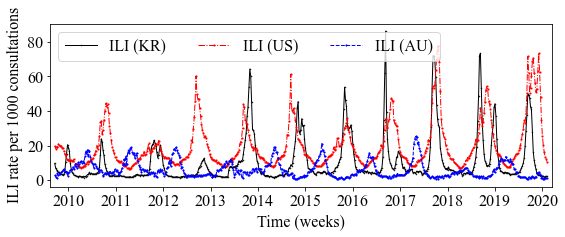

In [31]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(9, 3))
plt.plot(KCDC.values.T[:, :-1].reshape(11*52)[:-31], c='k', ls='-', marker='.', markersize=1, linewidth=1,
        label='ILI (KR)')
plt.plot(CDC.values.T[:, :-1].reshape(11*52)[:-31], c='red', ls='-.', marker='s', markersize=1, linewidth=1,
        label='ILI (US)')
plt.plot(ASPREN.values.T[:, :-1].reshape(11*52)[:-31], c='blue', ls='--', marker='D', markersize=1, linewidth=1,
        label='ILI (AU)')
plt.xticks(np.arange(15, 541, 52), CDC.columns)
plt.xlabel('Time (weeks)')
plt.ylabel('ILI rate per 1000 consultations')
plt.xlim(0-5, 541+5)
plt.legend(ncol=3)
plt.savefig('./image/v3/ILI_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

ahead: 1


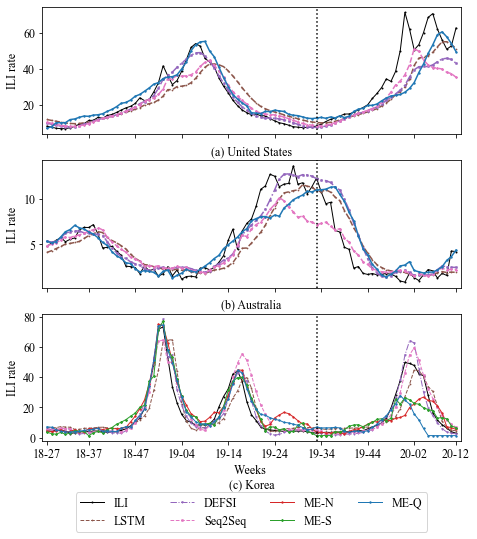

ahead: 5


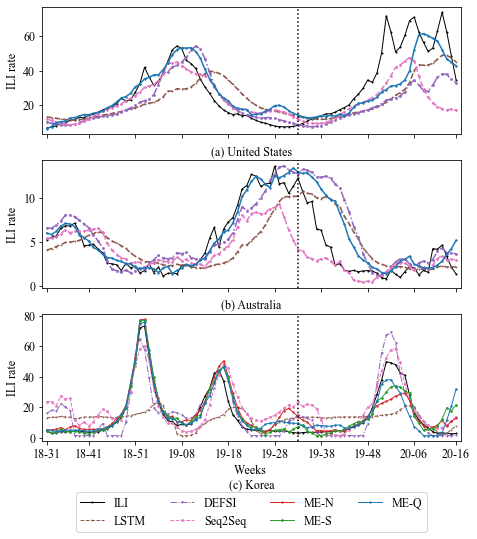

ahead: 10


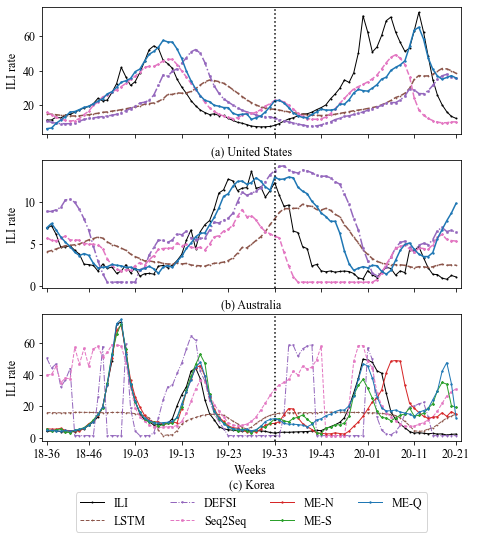

In [832]:
# 3개 국가의 1, 5, 10주 예측 그래프

plt.rcParams.update({'font.size': 12})

for ahead in [1, 5, 10]:
    print('ahead:', ahead)
    markers = ['.', 's', 'D', 'h']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
    line_styles = ['--', '-.', '--', '-']
    x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

    fig, axs = plt.subplots(3, 1, figsize=(7.5, 8))


    idx = 0
    axs[0].plot(CDC_scaler.inverse_transform(np.array(US_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (US)')
    for m in ['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']:
        prd = US_predict[m]
        if m == 'ME-T(US)':
            lbl = 'MEDIF-T(US)'
        else:
            lbl = m if m != 'Basic-LSTM(US)' else 'LSTM(US)'

        axs[0].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[0].set_xlim(0-1, 88+1)
    axs[0].set_ylabel('ILI rate')
    axs[0].set_xlabel('(a) United States')
    axs[0].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[0].set_xticklabels([])
    # axs[0].set_yticks([20, 40, 60])
    # axs[0].set_yticklabels([20, 40, 60], fontsize=7)
    axs[0].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[0].legend(ncol=6)

    idx = 0
    axs[1].plot(ASPREN_scaler.inverse_transform(np.array(AU_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (AU)')
    for m in ['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']:
        prd = AU_predict[m]
        if m == 'ME-T(AU)':
            lbl = 'MEDIF-T(AU)'
        else:
            lbl = m if m != 'Basic-LSTM(AU)' else 'LSTM(AU)'

        axs[1].plot(ASPREN_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[1].set_xlim(0-1, 88+1)
    # axs[1].set_ylim(0, 20)
    axs[1].set_ylabel('ILI rate')
    axs[1].set_xlabel('(b) Australia')
    axs[1].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[1].set_xticklabels([])
    # axs[1].set_yticks(np.arange(0, 20, 5))
    # axs[1].set_yticklabels(np.arange(0, 20, 5), fontsize=7)
    axs[1].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[1].legend(ncol=8, fontsize=7, loc='upper left')

    markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
    line_styles = ['--', '-.', '--', '-', '-', '-']

    idx = 0
    axs[2].plot(KCDC_scaler.inverse_transform(np.array(KR_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (KR)')
    for m in ['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']:
        prd = KR_predict[m]
        if m == 'ME-T' or m == 'ME-N' or m == 'ME-S' or m == 'ME-A':
            lbl = 'MEDIF-' + m[-1]
        else:
            lbl = m if m != 'Basic-LSTM' else 'LSTM'
        lbl += '(KR)'

        axs[2].plot(KCDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                linewidth=1, marker=markers[idx], markersize=1.5)
        idx += 1
    axs[2].set_xlim(0-1, 88+1)
    # axs[2].set_ylim(0, 100)
    axs[2].set_ylabel('ILI rate')
    axs[2].set_xlabel('Weeks \n(c) Korea')
    axs[2].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[2].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]])
    # axs[2].set_yticks(np.arange(0, 100, 25))
    # axs[2].set_yticklabels(np.arange(0, 100, 25), fontsize=7)
    axs[2].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[2].legend(ncol=8, fontsize=7)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=4, 
               labels=['ILI', 'LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-Q'])
    # plt.grid(True, ls='--')
    plt.savefig('./image/v2/' + str(ahead) + '-step-ahead_predict.png', dpi=300, bbox_inches='tight')
    plt.show()

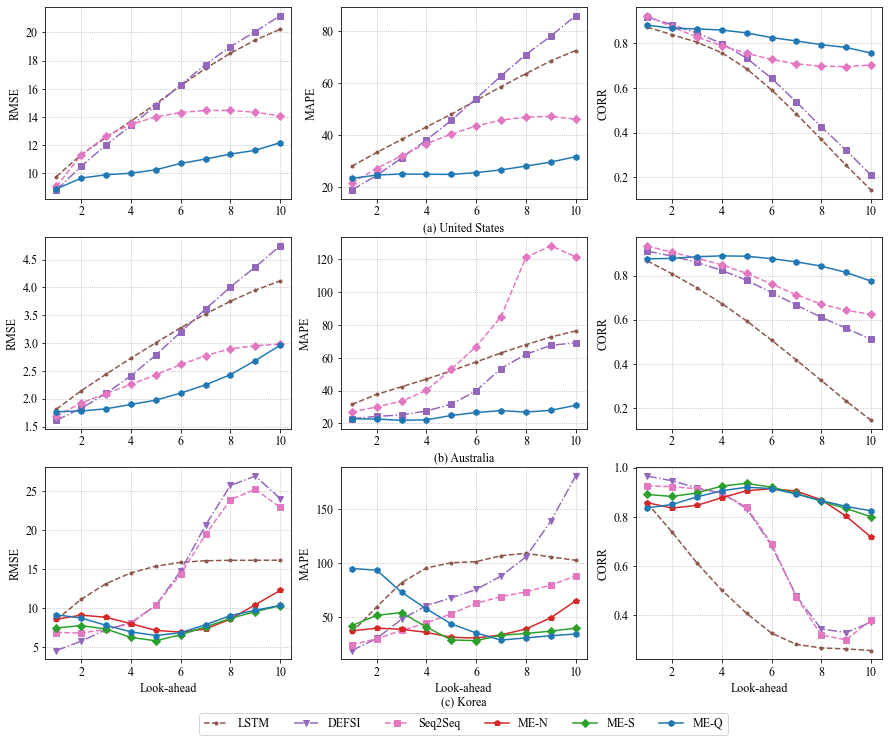

In [834]:
# 3개 국가의 1, 5, 10주 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = US_perform[[c for c in US_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
#         axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')
axs[0, 1].set_xlabel('(a) United States')
        
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = AU_perform[[c for c in AU_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']):
        axs[1, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[1, col].set_ylabel(ev.upper())
#         axs[1, col].set_xlabel('ahead')
        axs[1, col].set_xticks(range(1, 11, 2))
        axs[1, col].set_xticklabels(range(2, 12, 2))
        axs[1, col].grid(True, ls=':')
axs[1, 1].set_xlabel('(b) Australia')
        
markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
line_styles = ['--', '-.', '--', '-', '-', '-']
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = KR_perform[[c for c in KR_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']):
        axs[2, col].plot(target_df.T[m].values, marker=markers[i], c=colors[i],
                ls=line_styles[i], label=m)
        axs[2, col].set_ylabel(ev.upper())
        axs[2, col].set_xlabel('Look-ahead')
        axs[2, col].set_xticks(range(1, 11, 2))
        axs[2, col].set_xticklabels(range(2, 12, 2))
        axs[2, col].grid(True, ls=':')
axs[2, 1].set_xlabel('Look-ahead\n(c) Korea')

plt.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.25), ncol=6,
          labels=['LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-Q'])
plt.savefig('./image/v2/All_perform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

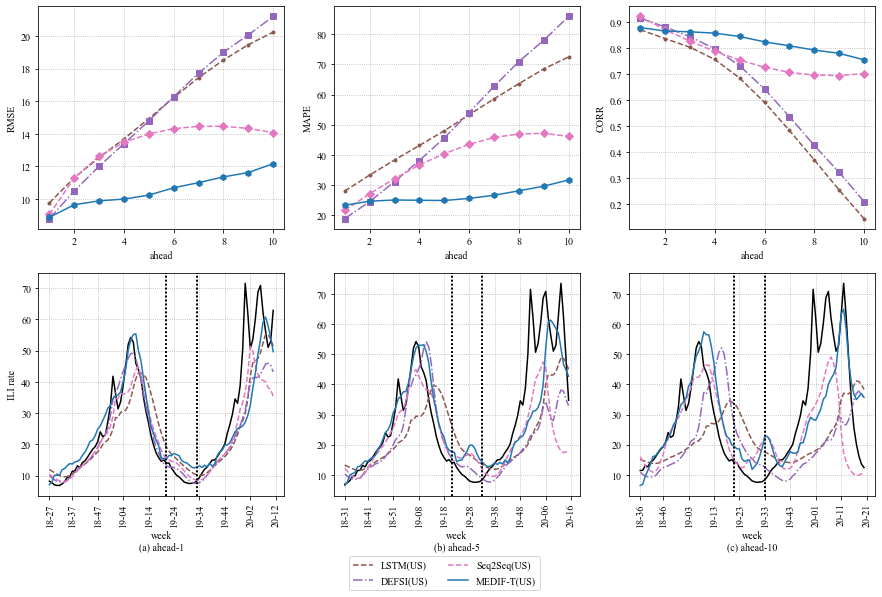

In [487]:
# US perform 비교 및 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = US_perform[[c for c in US_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(CDC_scaler.inverse_transform(np.array(US_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']:
        prd = US_predict[m]
        if m == 'ME-T(US)':
            lbl = 'MEDIF-T(US)'
        else:
            lbl = m if m != 'Basic-LSTM(US)' else 'LSTM(US)'
            
        axs[1, i].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(US_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=2)
# plt.savefig('./image/v2/US_comparision_models.png', dpi=300, bbox_inches='tight')
plt.show()

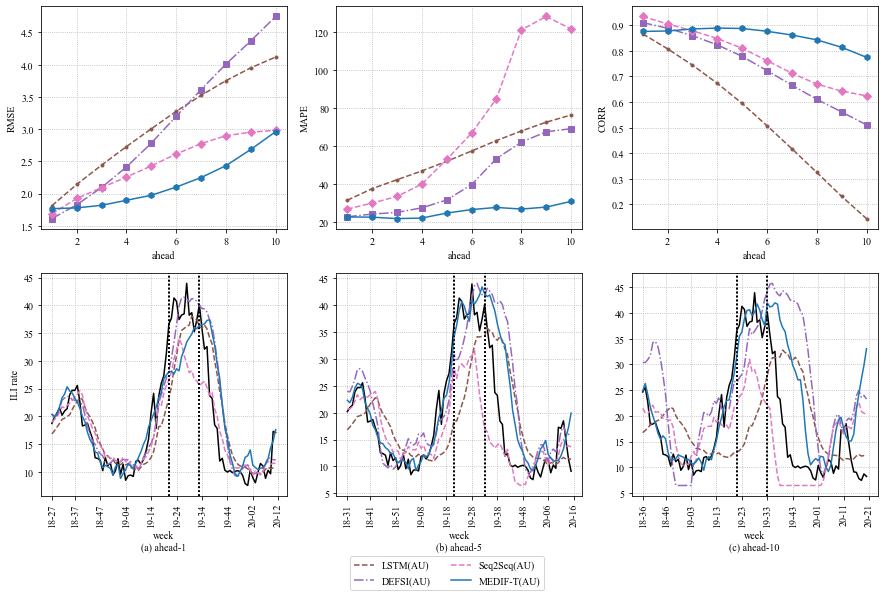

In [488]:
# AU perform 비교 및 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = AU_perform[[c for c in AU_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(CDC_scaler.inverse_transform(np.array(AU_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']:
        prd = AU_predict[m]
        if m == 'ME-T(AU)':
            lbl = 'MEDIF-T(AU)'
        else:
            lbl = m if m != 'Basic-LSTM(AU)' else 'LSTM(AU)'
            
        axs[1, i].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(AU_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=2)
# plt.savefig('./image/v2/AU_comparision_models.png', dpi=300, bbox_inches='tight')
plt.show()

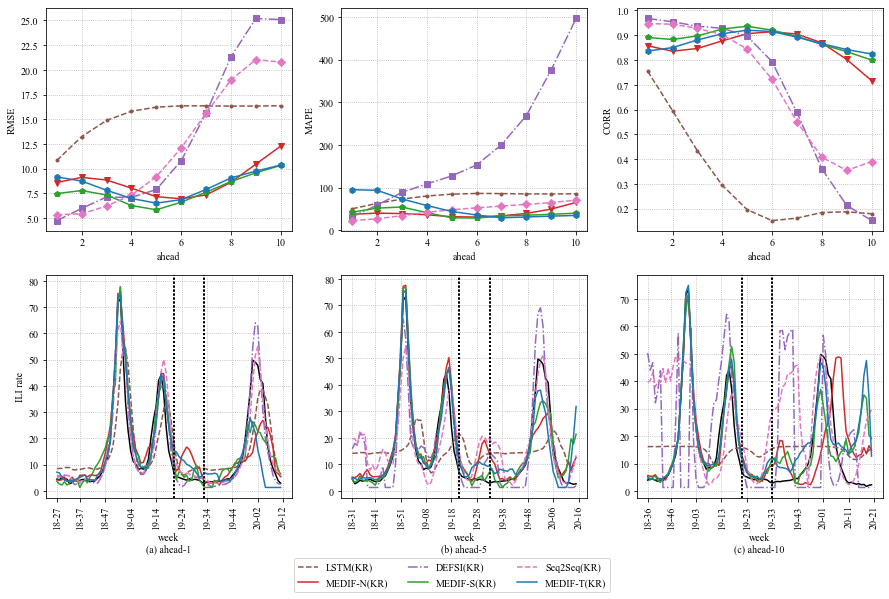

In [489]:
# KR perform 비교 및 예측 그래프

markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
colors = ['tab:brown', 'tab:red', 'tab:purple', 'tab:green', 'tab:pink', 'tab:blue', 'tab:olive']
line_styles = ['--', '-', '-.', '-', '--', '-', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = KR_perform[[c for c in KR_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM', 'ME-N', 'DEFSI', 'ME-S', 'Seq2Seq', 'ME-T']):
        axs[0, col].plot(target_df.T[m].values, marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(KCDC_scaler.inverse_transform(np.array(KR_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM', 'ME-N', 'DEFSI', 'ME-S', 'Seq2Seq', 'ME-T']:
        prd = KR_predict[m]
        if m == 'ME-T' or m == 'ME-N' or m == 'ME-S' or m == 'ME-A':
            lbl = 'MEDIF-' + m[-1]
        else:
            lbl = m if m != 'Basic-LSTM' else 'LSTM'
        lbl += '(KR)'
            
        axs[1, i].plot(KCDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(KR_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=3)
# plt.savefig('./image/v2/KR_comparison_models.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
KR_news_lag

,인플루엔자,콜레라,유행병,홍역,뎅기열,출혈열,치사율,광견병,장티푸스,발병,...,새우,재조합,괴저,극심,미코박테륨,저항성,쿠바인,모야,맹골수도,일교차
0,0.028871,-0.183993,-0.191658,0.048562,-0.226441,-0.373143,-0.232714,-0.069283,-0.163949,-0.156209,...,0.207110,-0.029782,0.132558,-0.106898,-0.011783,-0.110063,-0.031011,-0.119879,NaN,-0.169018
1,-0.019393,-0.262565,-0.227758,-0.031014,-0.259974,-0.439540,-0.323791,-0.073118,-0.154368,-0.209435,...,0.209299,-0.042292,0.012885,-0.155840,0.077729,-0.066428,0.025238,-0.118025,NaN,-0.157164
2,-0.047765,-0.327688,-0.232314,-0.083143,-0.299895,-0.494375,-0.381542,-0.074773,-0.152895,-0.239158,...,0.227976,-0.048276,-0.063650,-0.185311,0.185532,-0.064494,0.070122,-0.105064,NaN,-0.123509
3,-0.039810,-0.366664,-0.211589,-0.107649,-0.336050,-0.505830,-0.401263,-0.059836,-0.147240,-0.227083,...,0.266075,-0.038934,-0.102288,-0.188209,0.311028,-0.031242,0.109060,-0.046663,NaN,-0.044031
4,0.003984,-0.389346,-0.171854,-0.088399,-0.333527,-0.450527,-0.380903,-0.049388,-0.131453,-0.173573,...,0.303830,-0.025458,-0.104984,-0.164459,0.313127,-0.000371,0.152207,0.057638,NaN,0.070774
5,0.054042,-0.389104,-0.111435,-0.039374,-0.296578,-0.363789,-0.343966,-0.055905,-0.092550,-0.106947,...,0.323648,-0.028032,-0.082881,-0.117906,0.220317,0.013297,0.177148,0.177935,NaN,0.188671
6,0.079506,-0.366011,-0.068290,0.022598,-0.236019,-0.285526,-0.304586,-0.077990,-0.034529,-0.052265,...,0.322419,-0.056792,-0.038235,-0.071507,0.151047,0.023537,0.207667,0.264766,NaN,0.297328
7,0.094259,-0.328795,-0.037656,0.093668,-0.160439,-0.214891,-0.271965,-0.108955,0.026371,-0.007668,...,0.285898,-0.096656,0.022551,-0.011645,0.125258,0.072812,0.215613,0.324072,NaN,0.400772
8,0.119740,-0.285379,-0.040206,0.170755,-0.094731,-0.141700,-0.236919,-0.127977,0.074574,0.035898,...,0.254334,-0.135785,0.078025,0.044087,0.095871,0.150905,0.258760,0.317180,NaN,0.490833
9,0.137719,-0.241032,-0.052236,0.225411,-0.048739,-0.091674,-0.214544,-0.144427,0.114043,0.050071,...,0.210797,-0.185214,0.155146,0.055405,0.062359,0.218072,0.306854,0.261226,NaN,0.548103


In [34]:
US_trends_lag_coef = {}
US_trends_lag_sorted = {}
for word in US_trends_lag:
    if not np.isnan(US_trends_lag[word].max()):
        US_trends_lag_coef[word] = (US_trends_lag[word].argmax(), US_trends_lag[word].max())
US_trends_lag_sorted = sorted(US_trends_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
US_trends_lag_sorted = [US_trends_lag[w].values for w, l in US_trends_lag_sorted]
        
KR_news_lag_coef = {}
KR_news_lag_sorted = {}
for word in KR_news_lag:
    if not np.isnan(KR_news_lag[word].max()):
        KR_news_lag_coef[word] = (KR_news_lag[word].argmax(), KR_news_lag[word].max())
KR_news_lag_sorted = sorted(KR_news_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_news_lag_sorted = [KR_news_lag[w].values-0.1 for w, l in KR_news_lag_sorted]
        
KR_sns_lag_coef = {}
KR_sns_lag_sorted = {}
for word in KR_sns_lag:
    if not np.isnan(KR_sns_lag[word].max()):
        KR_sns_lag_coef[word] = (KR_sns_lag[word].argmax(), KR_sns_lag[word].max())
KR_sns_lag_sorted = sorted(KR_sns_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_sns_lag_sorted = [KR_sns_lag[w].values for w, l in KR_sns_lag_sorted]
        
KR_trends_lag_coef = {}
KR_trends_lag_sorted = {}
for word in KR_trends_lag:
    if not np.isnan(KR_trends_lag[word].max()):
        KR_trends_lag_coef[word] = (KR_trends_lag[word].argmax(), KR_trends_lag[word].max())
KR_trends_lag_sorted = sorted(KR_trends_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_trends_lag_sorted = [KR_trends_lag[w].values for w, l in KR_trends_lag_sorted]

In [15]:
print('news',
      max([max(ls) for ls in KR_news_lag_sorted]),
      np.mean([max(ls) for ls in KR_news_lag_sorted if not np.isnan(np.mean(ls))]))

print('sns',
      max([max(ls) for ls in KR_sns_lag_sorted]),
      np.mean([max(ls) for ls in KR_sns_lag_sorted if not np.isnan(np.mean(ls))]))

print('trends',
      max([max(ls) for ls in KR_trends_lag_sorted]),
      np.mean([max(ls) for ls in KR_trends_lag_sorted if not np.isnan(np.mean(ls))]))

news 0.5683813566432755 0.060961661701479236
sns 0.7896030847938739 0.15991923810410655
trends 0.853658720841111 0.143033271397313


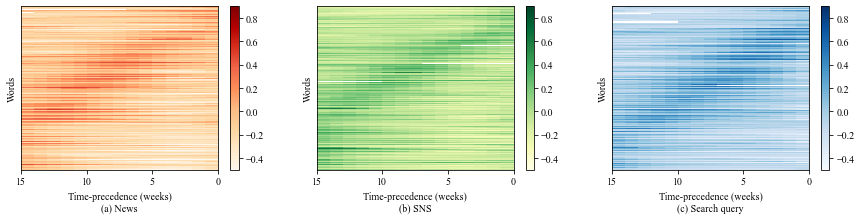

In [36]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

KR_news_pcm = axs[0].pcolormesh(KR_news_lag_sorted, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(KR_sns_lag_sorted, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(KR_trends_lag_sorted, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Time-precedence (weeks)\n(a) News', 'Time-precedence (weeks)\n(b) SNS', 'Time-precedence (weeks)\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')
plt.savefig('./image/v3/KR_word_time_delay_sorted.png', dpi=300, bbox_inches='tight')
plt.show()

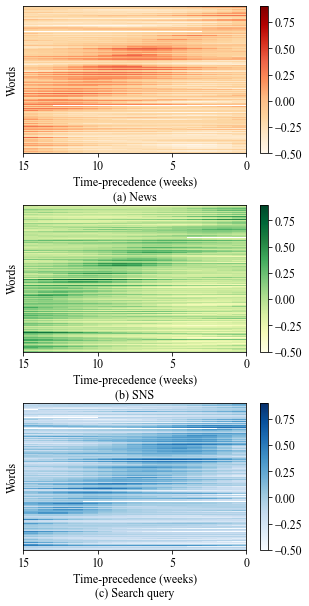

In [79]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(3, 1, figsize=(5, 10))

KR_news_pcm = axs[0].pcolormesh(KR_news_lag_sorted, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(KR_sns_lag_sorted, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(KR_trends_lag_sorted, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Time-precedence (weeks)\n(a) News', 'Time-precedence (weeks)\n(b) SNS', 'Time-precedence (weeks)\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')

plt.subplots_adjust(hspace=0.35)
plt.savefig('./image/v3/KR_word_time_delay_sorted_vertical.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

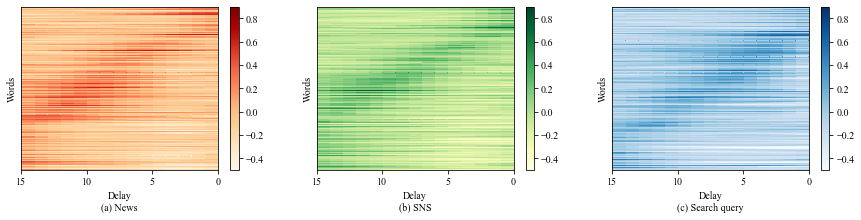

In [836]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

KR_news_pcm = axs[0].pcolormesh(KR_news_lag_sorted, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(KR_sns_lag_sorted, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(KR_trends_lag_sorted, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Delay\n(a) News', 'Delay\n(b) SNS', 'Delay\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')
# plt.savefig('./image/v2/KR_word_time_delay.png', dpi=300, bbox_inches='tight')
plt.show()

In [693]:
# 사용된 단어들의 coef 평균 (국가별)

print('US:', US_trends_max_lag.loc['coef'].mean())
print('AU:', AU_trends_max_lag.loc['coef'].mean())
print('KR:', np.mean([KR_news_max_lag.loc['coef'].mean(), 
         KR_sns_max_lag.loc['coef'].mean(),
         KR_trends_max_lag.loc['coef'].mean()]))

US: 0.6584485967599903
AU: 0.5975889537471453
KR: 0.5681011085951118


In [11]:
KR_news_max_lag.T.sort_values(by='coef', ascending=False)

,max_lag,coef
걸음마,13.0,0.668381
분변,5.0,0.652478
잠수병,12.0,0.619058
간암,9.0,0.612361
일교차,10.0,0.586671
접종,11.0,0.577404
퍼질,12.0,0.566773
혈청병,7.0,0.566326
항원,7.0,0.559616
괴질,14.0,0.540919


In [71]:
KR_sns_max_lag.T.sort_values(by='coef', ascending=False)

,max_lag,coef
접종,10.0,0.789603
비염,14.0,0.646343
초가을,13.0,0.610857
생후,14.0,0.607914
프라이온,10.0,0.584427
처방,11.0,0.555533
학질모기,8.0,0.549243
백일,11.0,0.520729
사육,13.0,0.515915
외독소,8.0,0.515337


In [12]:
KR_trends_max_lag.T.sort_values(by='coef', ascending=False)

,max_lag,coef
비염,13.0,0.688995
접종,10.0,0.665724
엘토르,5.0,0.635087
새우,14.0,0.629033
지방간,5.0,0.618896
장폐색,7.0,0.607277
생백신,9.0,0.603491
엘니뇨,5.0,0.587258
칠면조,4.0,0.587170
백일,9.0,0.558871


In [9]:
AU_trends_max_lag.T.sort_values(by='coef', ascending=False)

,max_lag,coef
vaccination,14.0,0.731976
vaccines,14.0,0.667766
vaccine,14.0,0.635705
flu vaccination,13.0,0.632048
Flu Shot,12.0,0.625027
flu vaccine,13.0,0.612498
Flu shots,13.0,0.586942
influenza vaccine,13.0,0.586407
flue,10.0,0.563141
flu vaccinations,12.0,0.553356


In [72]:
US_trends_max_lag.T.sort_values(by='coef', ascending=False)

,max_lag,coef
RSV,6.0,0.906976
colds,6.0,0.853243
virus RSV,5.0,0.817769
laryngitis,5.0,0.806003
croup,9.0,0.801793
flu bug,5.0,0.765800
Stomach flu,5.0,0.746935
stomach bug,5.0,0.746000
Norovirus bug,5.0,0.729614
respiratory syncytial virus,5.0,0.726743


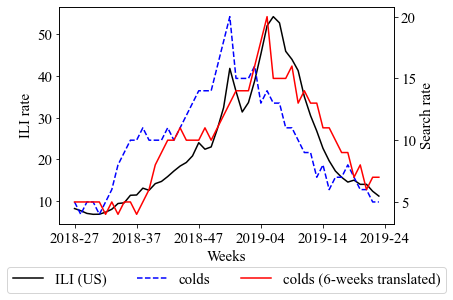

In [80]:
plt.rcParams.update({'font.size': 15})

lag = 6
target_word = 'colds'

fig, ax1 = plt.subplots()
ili_org = ax1.plot(CDC_scaler.inverse_transform(np.array(US_target_truth).reshape(-1, 1)[:50]), c='k', label='ILI (US)')
ax2 = ax1.twinx()
tmp1 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week - lag).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21-lag-1).zfill(2))][target_word].values[:50]
tmp2 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21).zfill(2))][target_word].values[:50]
wd_org = ax2.plot(tmp2, c='blue', label='colds', ls='--')
wd_delay = ax2.plot(tmp1, c='red', label='colds (6-weeks translated)')

ax1.set_xticks([0, 10, 20, 30, 40, 50])
ax1.set_xticklabels(['20'+w for w in ticks_weeks[[0, 10, 20, 30, 40, 50]]])

ax1.set_ylabel('ILI rate')
ax2.set_ylabel('Search rate')

ax1.set_xlabel('Weeks')

fig.legend(loc='lower center', bbox_to_anchor=(0.5,-0.35), bbox_transform=ax1.transAxes, ncol=3)
plt.savefig('./image/v3/US_delay_example(colds).png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

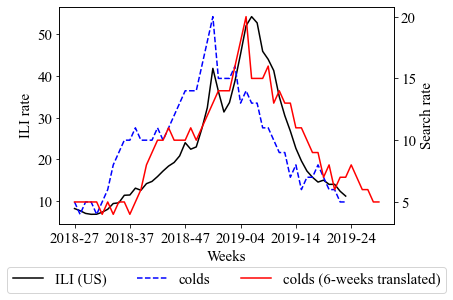

In [19]:
plt.rcParams.update({'font.size': 15})

lag = 6
target_word = 'colds'

fig, ax1 = plt.subplots()
ili_org = ax1.plot(CDC_scaler.inverse_transform(np.array(US_target_truth).reshape(-1, 1)[:50]), c='k', label='ILI (US)')
ax2 = ax1.twinx()
tmp1 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week - lag).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21-lag-1).zfill(2))][target_word].values[:56]
tmp2 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21).zfill(2))][target_word].values[:50]
wd_org = ax2.plot(tmp2, c='blue', label='colds', ls='--')
wd_delay = ax2.plot(tmp1, c='red', label='colds (6-weeks translated)')

ax1.set_xticks([0, 10, 20, 30, 40, 50])
ax1.set_xticklabels(['20'+w for w in ticks_weeks[[0, 10, 20, 30, 40, 50]]])

ax1.set_ylabel('ILI rate')
ax2.set_ylabel('Search rate')

ax1.set_xlabel('Weeks')

fig.legend(loc='lower center', bbox_to_anchor=(0.5,-0.35), bbox_transform=ax1.transAxes, ncol=3)
# plt.savefig('./image/v3/US_delay_example(colds).png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
KR_trends_words_num_by_coef = []
threshold_coef_range = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for threshold_coef in threshold_coef_range:
    tmp = []
    for word, (max_lag, coef) in KR_trends_lag_coef.items():
        if coef < threshold_coef:
            continue
        tmp.append((word, max_lag, coef))        
    KR_trends_words_num_by_coef.append(len(tmp))


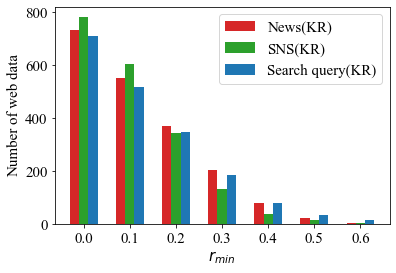

In [812]:
plt.rcParams.update({'font.size': 15})

coef_x_ticks = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6']
x_index = np.arange(0, 7)
bar_width = 0.2

plt.bar(x_index-bar_width, KR_news_words_num_by_coef,
        bar_width, label='News(KR)', color='tab:red')
plt.bar(x_index, KR_sns_words_num_by_coef,
        bar_width, label='SNS(KR)', color='tab:green')
plt.bar(x_index+bar_width, KR_trends_words_num_by_coef,
        bar_width, label='Search query(KR)', color='tab:blue')

plt.xticks(x_index, coef_x_ticks)
plt.ylabel('Number of web data')
plt.xlabel('$r_{min}$')
plt.legend()
plt.savefig('./image/v2/KR_threshold_coef.png', dpi=300, bbox_inches='tight')
plt.show()

In [462]:
print('news:',  KR_news_words_num_by_coef)
print('sns:', KR_sns_words_num_by_coef)
print('trends:', KR_trends_words_num_by_coef)

news: [732, 553, 371, 206, 81, 22, 5]
sns: [782, 605, 345, 134, 37, 15, 5]
trends: [709, 519, 349, 187, 78, 34, 15]


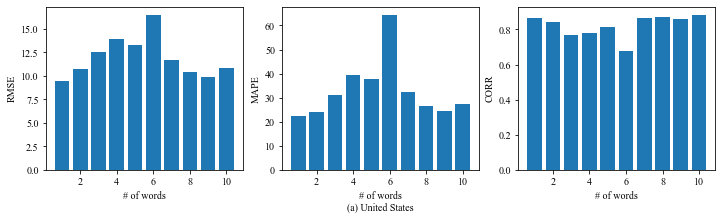

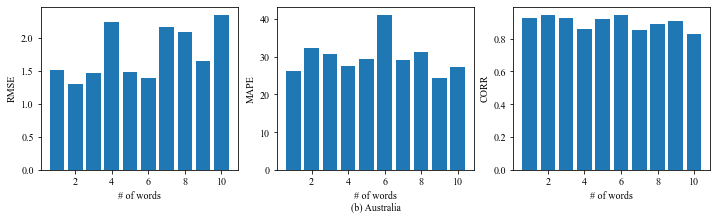

In [209]:
mean_by_num_words = {
    'US': {},
    'AU': {},
    'KR': {'N':{}, 'S': {}, 'T': {}},
}

colors = ['red', 'blue', 'green']
xlabels = ['(a) United States', '(b) Australia']

for row, country in enumerate(['US', 'AU']):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    for col, ev in enumerate(['rmse', 'mape', 'corr']):
        tmp = []
        mean_by_num_words[country][ev] = []
        for num_words in range(1, 11):
            tmp.append(pd.DataFrame(perform_by_num_words[country][num_words]['perform']).T[
                ['total_%s_%s' % (ev, i) for i in range(1, 11)]
            ].values.mean())
            
            origin_values = performs[country].loc[
                'ME-T(%s)' % country, ['total_%s_%s' % (ev, i) for i in range(1, 11)]].values
            target_values = pd.DataFrame(perform_by_num_words[country][num_words]['perform']).T[
                ['total_%s_%s' % (ev, i) for i in range(1, 11)]].values.reshape(-1)
            improve_val = ((origin_values - target_values) / origin_values 
                           if ev != 'corr' else (target_values - origin_values) / origin_values)
            mean_by_num_words[country][ev].append(improve_val.mean())
            
        tmp = np.array(tmp)
        axs[col].bar(np.arange(1, 11), tmp, color='tab:blue')

    axs[0].set_ylabel('RMSE')
    axs[1].set_ylabel('MAPE')
    axs[2].set_ylabel('CORR')
    axs[0].set_xlabel('# of words')
    axs[1].set_xlabel('# of words\n%s' % xlabels[row])
    axs[2].set_xlabel('# of words')

    plt.savefig('./image/v2/%s_perform_by_num_words.png' % country,
                dpi=300, bbox_inches='tight')
    plt.show()

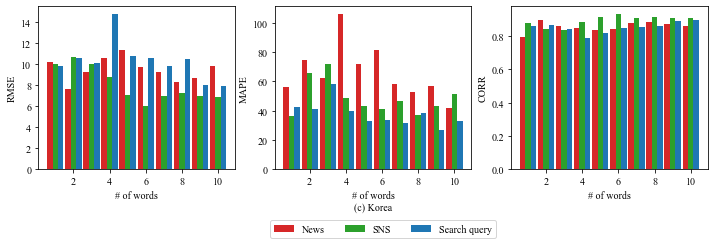

In [210]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
bar_width = 0.3
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    tmp = []
    mean_by_num_words['KR']['N'][ev] = []
    mean_by_num_words['KR']['S'][ev] = []
    mean_by_num_words['KR']['T'][ev] = []
    for num_words in range(1, 11):
        tmp.append(pd.DataFrame(perform_by_num_words['KR'][num_words]['perform']).T[
            ['total_%s_%s' % (ev, i) for i in range(1, 11)]
        ].values.mean(axis=1))
        
        for j, d_type in enumerate(['N', 'S', 'T']):
            origin_values = performs['KR'].loc[
                'ME-%s' % d_type, 
                ['total_%s_%s' % (ev, i) for i in range(1, 11)]].values
            target_values = pd.DataFrame(perform_by_num_words['KR'][num_words]['perform']).T[
                ['total_%s_%s' % (ev, i) for i in range(1, 11)]].values[j].reshape(-1)
            improve_val = ((origin_values - target_values) / origin_values 
                           if ev != 'corr' else (target_values - origin_values) / origin_values)
            mean_by_num_words['KR'][d_type][ev].append(improve_val.mean())
        
    tmp = np.array(tmp)
    axs[col].bar(np.arange(1, 11) - bar_width, tmp.T[0], bar_width, color='tab:red')
    axs[col].bar(np.arange(1, 11), tmp.T[1], bar_width, color='tab:green')
    axs[col].bar(np.arange(1, 11) + bar_width, tmp.T[2], bar_width, color='tab:blue')

axs[0].set_ylabel('RMSE')
axs[1].set_ylabel('MAPE')
axs[2].set_ylabel('CORR')
axs[0].set_xlabel('# of words')
axs[1].set_xlabel('# of words\n%s' % '(c) Korea')
axs[2].set_xlabel('# of words')
plt.legend(['News', 'SNS', 'Search query'], bbox_to_anchor=(-0.65, -0.45),
           loc='lower center', ncol=3)
plt.savefig('./image/v2/%s_perform_by_num_words.png' % 'KR',
            dpi=300, bbox_inches='tight')
plt.show()

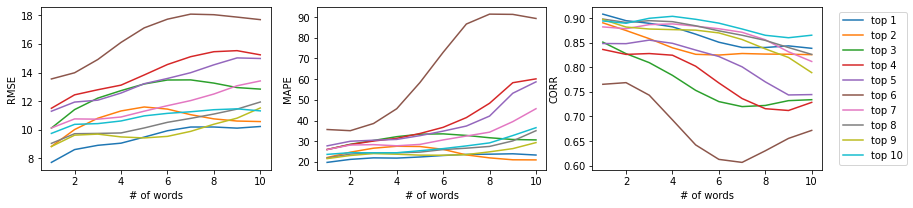

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    for num_words in range(1, 11):
        axs[col].plot(range(1, 11),
            pd.DataFrame(perform_by_num_words['US'][num_words]['perform']).T[
                ['total_%s_%s' % (ev, i) for i in range(1, 11)]
            ].values.reshape(-1), label='top %s' % num_words)
    
axs[0].set_ylabel('RMSE')
axs[1].set_ylabel('MAPE')
axs[2].set_ylabel('CORR')
axs[0].set_xlabel('# of words')
axs[1].set_xlabel('# of words')
axs[2].set_xlabel('# of words')


plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

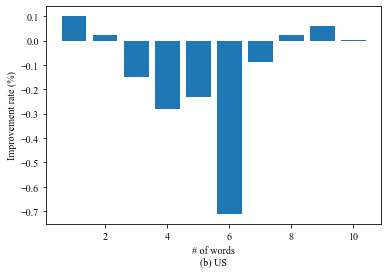

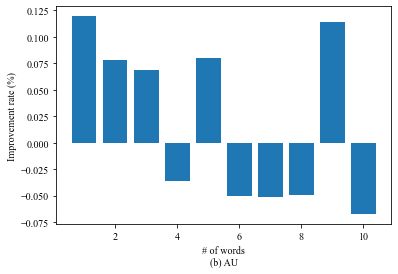

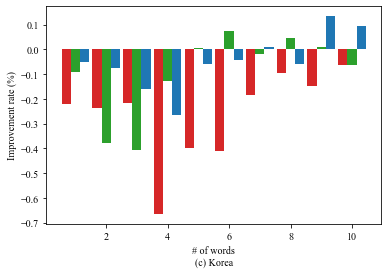

In [211]:
colors = ['tab:red', 'tab:green', 'tab:blue']

for country in ['US', 'AU', 'KR']:
    if country != 'KR':
        improves = []
        for i in range(1, 11):
            tmp = 0
            tmp += mean_by_num_words[country]['rmse'][i-1]
            tmp += mean_by_num_words[country]['mape'][i-1]
            tmp += mean_by_num_words[country]['corr'][i-1]
            tmp /= 3
            improves.append(tmp)
        plt.bar(np.arange(1, 11), improves)
        plt.ylabel('Improvement rate (%)')
        xlabel = '(a) United States' if country == 'US' else '(b) Australia'
        plt.xlabel('# of words\n%s %s' % (alphabet, country))
        plt.savefig('./image/v2/%s_improvement_by_num_words.png' % country,
            dpi=300, bbox_inches='tight')
        plt.show()
    else:
        for j, d_type in enumerate(['N', 'S', 'T']):
            improves = []
            for i in range(1, 11):
                tmp = 0
                tmp += mean_by_num_words[country][d_type]['rmse'][i-1]
                tmp += mean_by_num_words[country][d_type]['mape'][i-1]
                tmp += mean_by_num_words[country][d_type]['corr'][i-1]
                tmp /= 3
                improves.append(tmp)
            plt.bar(np.arange(1, 11) + bar_width * (j-1), improves, bar_width,
                    color=colors[j])
        plt.ylabel('Improvement rate (%)')
        plt.xlabel('# of words\n(c) Korea')
        plt.savefig('./image/v2/%s_improvement_by_num_words.png' % country,
            dpi=300, bbox_inches='tight')
        plt.show()

In [244]:
pd.DataFrame(perform_by_num_words['KR'][6]['perform']).T[
    ['total_%s_%s' % (ev, i) for i in [1, 5, 10]
    for ev in ['rmse', 'mape', 'corr']]
]

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
ME-N,11.610671,167.439666,0.730473,7.503780,57.828053,0.891468,12.643642,66.265251,0.812757
ME-S,5.328310,60.771518,0.947560,4.557405,33.524798,0.961676,8.518672,35.433092,0.873810
ME-T,5.553125,25.788717,0.953382,11.388151,35.596938,0.874500,12.002262,34.762766,0.756543


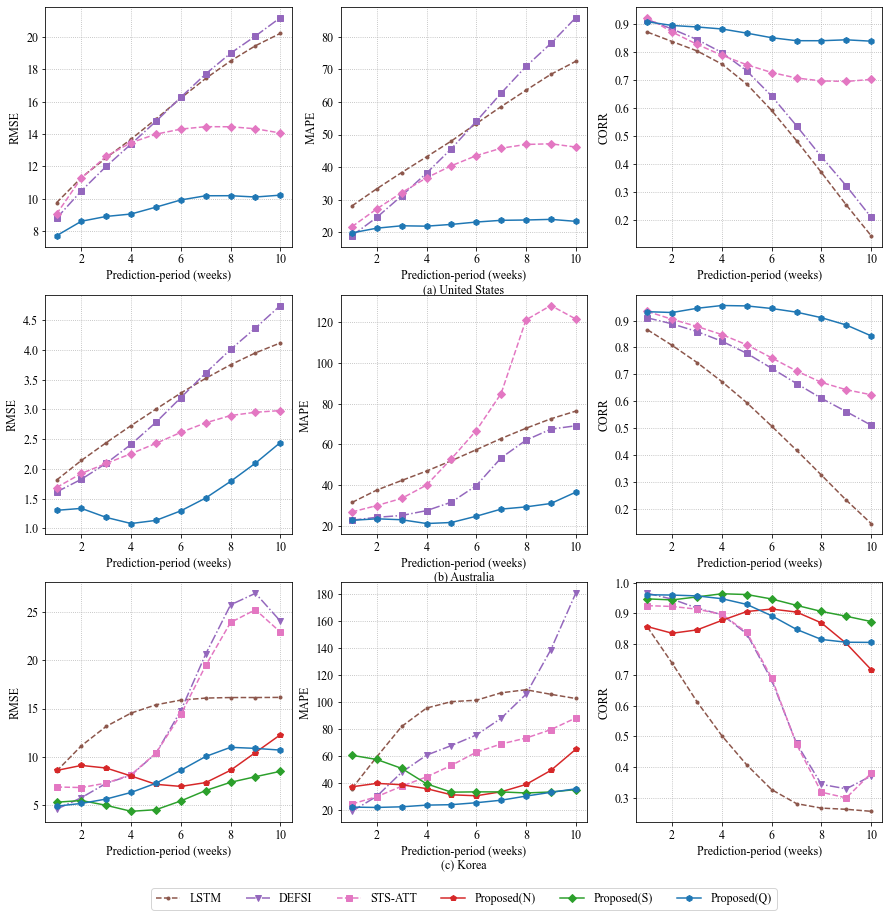

In [23]:
# 3개 국가의 1, 5, 10주 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = US_perform[[c for c in US_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']):
        perform_vals = (target_df.T[m].values if 'ME-' not in m 
                        else pd.DataFrame(perform_by_num_words['US'][1]['perform']).T[
                            ['total_%s_%s' % (ev, i) for i in range(1, 11)]
                        ].values.reshape(-1))
        axs[0, col].plot(perform_vals, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('Prediction-period (weeks)')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')
axs[0, 1].set_xlabel('Prediction-period (weeks)\n(a) United States')
        
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = AU_perform[[c for c in AU_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']):
        perform_vals = (target_df.T[m].values if 'ME-' not in m 
                        else pd.DataFrame(perform_by_num_words['AU'][1]['perform']).T[
                            ['total_%s_%s' % (ev, i) for i in range(1, 11)]
                        ].values.reshape(-1))
        
        axs[1, col].plot(perform_vals, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[1, col].set_ylabel(ev.upper())
        axs[1, col].set_xlabel('Prediction-period (weeks)')
        axs[1, col].set_xticks(range(1, 11, 2))
        axs[1, col].set_xticklabels(range(2, 12, 2))
        axs[1, col].grid(True, ls=':')
axs[1, 1].set_xlabel('Prediction-period (weeks)\n(b) Australia')
        
markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
line_styles = ['--', '-.', '--', '-', '-', '-']
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = KR_perform[[c for c in KR_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']):
        if 'ME-' not in m:
            perform_vals = target_df.T[m].values
        else:
            if m.split('-')[1] == 'N':
                perform_vals = target_df.T[m].values
            elif m.split('-')[1] == 'S':
                perform_vals = pd.DataFrame(perform_by_num_words['KR'][6]['perform']).T[
                                ['total_%s_%s' % (ev, i) for i in range(1, 11)]
                                ].T[m].values
            else:
                perform_vals = pd.DataFrame(perform_by_num_words['KR'][9]['perform']).T[
                                ['total_%s_%s' % (ev, i) for i in range(1, 11)]
                                ].T[m].values
                
                
#         perform_vals = (target_df.T[m].values if 'ME-' not in m 
#                         else pd.DataFrame(perform_by_num_words['KR'][9]['perform']).T[
#                             ['total_%s_%s' % (ev, i) for i in range(1, 11)]
#                         ].T[m].values)
        
        axs[2, col].plot(perform_vals, marker=markers[i], c=colors[i],
                ls=line_styles[i], label=m)
        axs[2, col].set_ylabel(ev.upper())
        axs[2, col].set_xlabel('Prediction-period (weeks)')
        axs[2, col].set_xticks(range(1, 11, 2))
        axs[2, col].set_xticklabels(range(2, 12, 2))
        axs[2, col].grid(True, ls=':')
axs[2, 1].set_xlabel('Prediction-period (weeks)\n(c) Korea')

plt.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.25), ncol=6,
          labels=['LSTM', 'DEFSI', 'STS-ATT',
                  'Proposed(N)', 'Proposed(S)', 'Proposed(Q)'])
plt.savefig('./image/v3/All_perform_apply_num_words_down_dpi.png', dpi=150, bbox_inches='tight')
plt.show()

ahead: 1


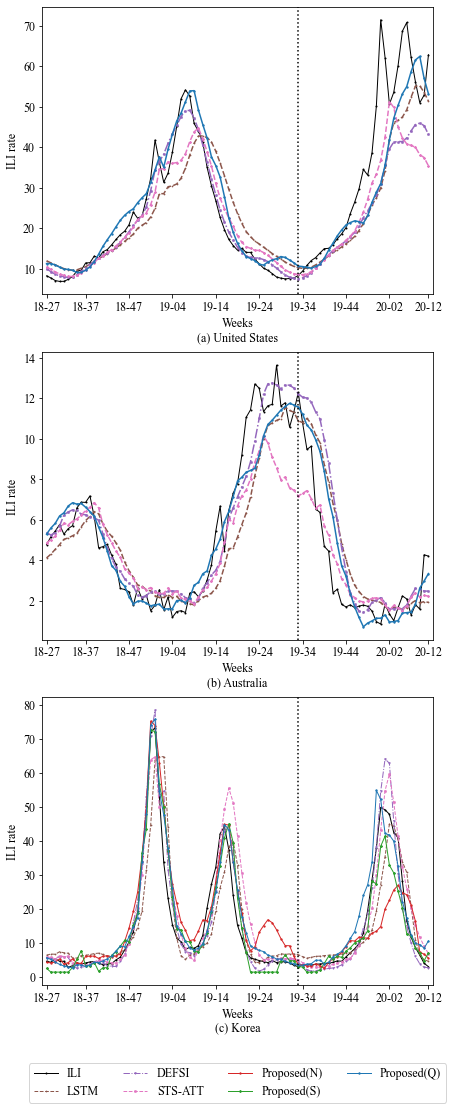

ahead: 2


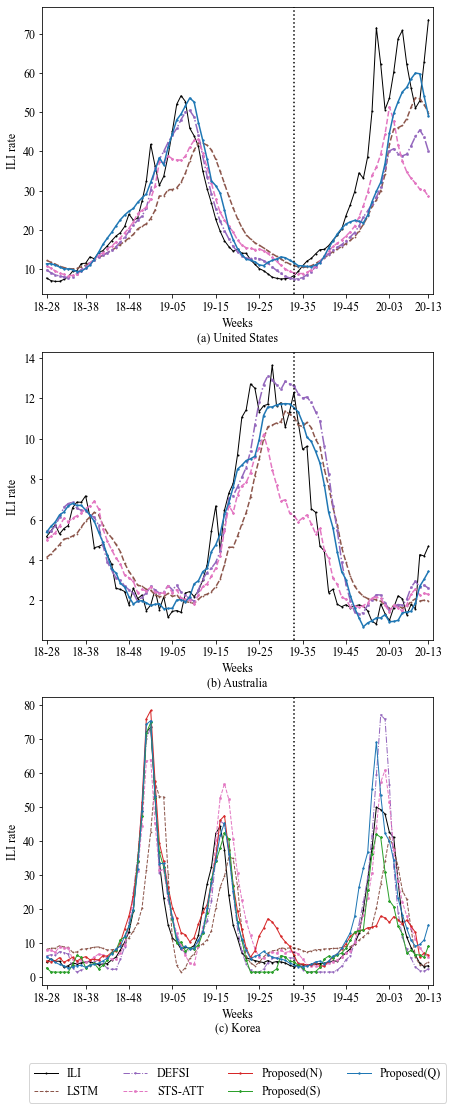

ahead: 10


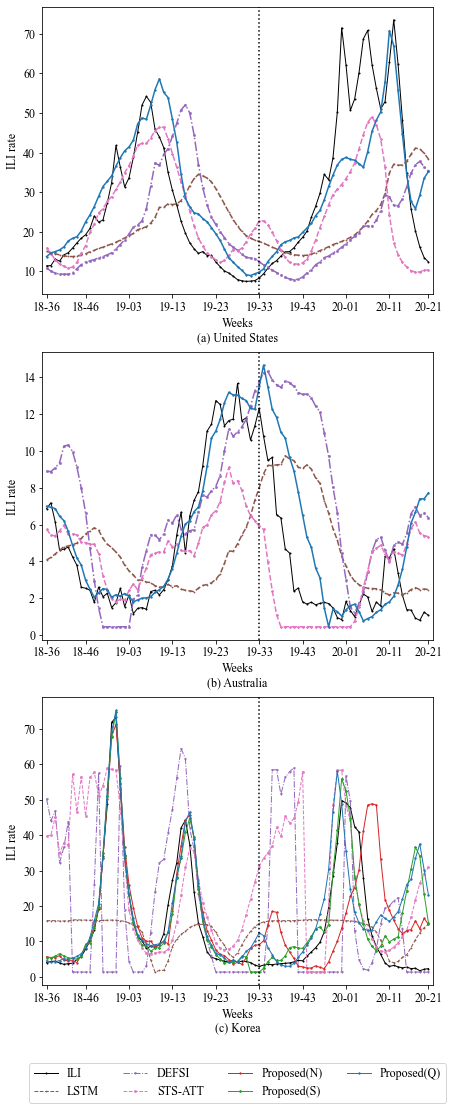

In [82]:
# 3개 국가의 1, 5, 10주 예측 그래프

plt.rcParams.update({'font.size': 12})

for ahead in [1, 2, 10]:
    print('ahead:', ahead)
    markers = ['.', 's', 'D', 'h']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
    line_styles = ['--', '-.', '--', '-']
    x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

    fig, axs = plt.subplots(3, 1, figsize=(7, 18))


    idx = 0
    axs[0].plot(CDC_scaler.inverse_transform(np.array(US_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (US)')
    for m in ['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']:
        prd = US_predict[m]
        if m == 'ME-T(US)':
            lbl = 'MEDIF-T(US)'
            prd = perform_by_num_words['US'][1]['prd']
        else:
            lbl = m if m != 'Basic-LSTM(US)' else 'LSTM(US)'

        axs[0].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[0].set_xlim(0-1, 88+1)
    axs[0].set_ylabel('ILI rate')
    axs[0].set_xlabel('Weeks\n(a) United States')
    axs[0].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[0].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]])
    axs[0].axvline(x=test_size-ahead+1, ls=':', c='k')
    

    idx = 0
    axs[1].plot(ASPREN_scaler.inverse_transform(np.array(AU_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (AU)')
    for m in ['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']:
        prd = AU_predict[m]
        if m == 'ME-T(AU)':
            lbl = 'MEDIF-T(AU)'
            prd = perform_by_num_words['AU'][1]['prd']
        else:
            lbl = m if m != 'Basic-LSTM(AU)' else 'LSTM(AU)'

        axs[1].plot(ASPREN_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[1].set_xlim(0-1, 88+1)
    axs[1].set_ylabel('ILI rate')
    axs[1].set_xlabel('Weeks\n(b) Australia')
    axs[1].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[1].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]])
    axs[1].axvline(x=test_size-ahead+1, ls=':', c='k')

    markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
    line_styles = ['--', '-.', '--', '-', '-', '-']

    idx = 0
    axs[2].plot(KCDC_scaler.inverse_transform(np.array(KR_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (KR)')
    for m in ['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']:
        prd = KR_predict[m]
        if m == 'ME-T' or m == 'ME-N' or m == 'ME-S' or m == 'ME-A':
            lbl = 'MEDIF-' + m[-1]
            if m.split('-')[1] == 'N':
                prd = KR_predict[m]
            elif m.split('-')[1] == 'S':
                prd = perform_by_num_words['KR'][6]['prd'][m]
            else:
                prd = perform_by_num_words['KR'][9]['prd'][m]
            
        else:
            lbl = m if m != 'Basic-LSTM' else 'LSTM'
        lbl += '(KR)'

        axs[2].plot(KCDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                linewidth=1, marker=markers[idx], markersize=1.5)
        idx += 1
    axs[2].set_xlim(0-1, 88+1)
    axs[2].set_ylabel('ILI rate')
    axs[2].set_xlabel('Weeks\n(c) Korea')
    axs[2].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[2].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]])
    axs[2].axvline(x=test_size-ahead+1, ls=':', c='k')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4, 
               labels=['ILI', 'LSTM', 'DEFSI', 'STS-ATT',
                       'Proposed(N)', 'Proposed(S)', 'Proposed(Q)'])
    # plt.grid(True, ls='--')
#     plt.subplots_adjust(hspace=0.15)
    plt.savefig('./image/v3/' + str(ahead) + '-step-ahead_predict.png', dpi=300, bbox_inches='tight')
    plt.show()

In [14]:
KR_news_lag_coef = {}
KR_news_lag_sorted = {}
for word in KR_news_lag:
    if not np.isnan(KR_news_lag[word].max()):
        KR_news_lag_coef[word] = (KR_news_lag[word].argmax(), KR_news_lag[word].max())
KR_news_lag_sorted = sorted(KR_news_lag_coef.items(), key=(lambda x: x[1][1]), reverse=True)
KR_news_lag_sorted = [KR_news_lag[w].values for w, l in KR_news_lag_sorted]
# np.random.shuffle(KR_news_lag_sorted)
        
KR_sns_lag_coef = {}
KR_sns_lag_sorted = {}
for word in KR_sns_lag:
    if not np.isnan(KR_sns_lag[word].max()):
        KR_sns_lag_coef[word] = (KR_sns_lag[word].argmax(), KR_sns_lag[word].max())
KR_sns_lag_sorted = sorted(KR_sns_lag_coef.items(), key=(lambda x: x[1][1]), reverse=True)
KR_sns_lag_sorted = [KR_sns_lag[w].values for w, l in KR_sns_lag_sorted]
# np.random.shuffle(KR_sns_lag_sorted)
        
KR_trends_lag_coef = {}
KR_trends_lag_sorted = {}
for word in KR_trends_lag:
    if not np.isnan(KR_trends_lag[word].max()):
        KR_trends_lag_coef[word] = (KR_trends_lag[word].argmax(), KR_trends_lag[word].max())
KR_trends_lag_sorted = sorted(KR_trends_lag_coef.items(), key=(lambda x: x[1][1]), reverse=True)
KR_trends_lag_sorted = [KR_trends_lag[w].values for w, l in KR_trends_lag_sorted]
# np.random.shuffle(KR_trends_lag_sorted)

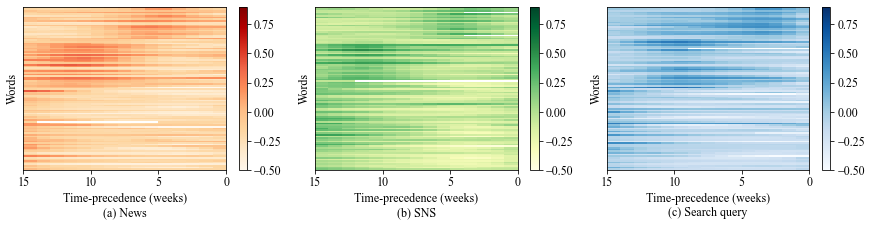

In [16]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

news_pcm_val = KR_news_lag_sorted[200:250] + KR_news_lag_sorted[400:430] + KR_news_lag_sorted[700:720]
# np.random.shuffle(news_pcm_val)
sns_pcm_val = KR_sns_lag_sorted[:50] + KR_sns_lag_sorted[400:430] + KR_sns_lag_sorted[700:720]
# np.random.shuffle(sns_pcm_val)
trends_pcm_val = KR_trends_lag_sorted[:50] + KR_trends_lag_sorted[400:430] + KR_trends_lag_sorted[700:720]
# np.random.shuffle(trends_pcm_val)

KR_news_pcm = axs[0].pcolormesh(news_pcm_val, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(sns_pcm_val, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(trends_pcm_val, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Time-precedence (weeks)\n(a) News',
           'Time-precedence (weeks)\n(b) SNS',
           'Time-precedence (weeks)\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')
plt.subplots_adjust(wspace=0.15)
# plt.savefig('./image/v3/KR_word_time_delay.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
print('news lag mean:', np.mean([coef_lag.argmax() for coef_lag in KR_news_lag_sorted if coef_lag.max() > 0.5]))
print('sns lag mean:', np.mean([coef_lag.argmax() for coef_lag in KR_sns_lag_sorted if coef_lag.max() > 0.5]))
print('trends lag mean:', np.mean([coef_lag.argmax() for coef_lag in KR_trends_lag_sorted if coef_lag.max() > 0.5]))

news lag mean: 8.090909090909092
sns lag mean: 9.066666666666666
trends lag mean: 5.382352941176471


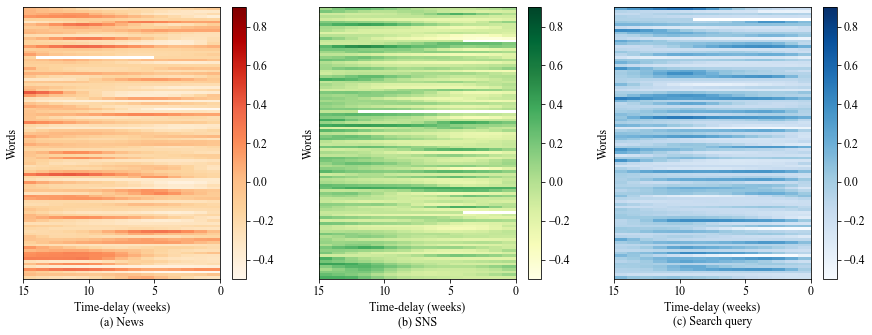

In [28]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

news_pcm_val = KR_news_lag_sorted[200:250] + KR_news_lag_sorted[400:430] + KR_news_lag_sorted[700:720]
np.random.shuffle(news_pcm_val)
sns_pcm_val = KR_sns_lag_sorted[:50] + KR_sns_lag_sorted[400:430] + KR_sns_lag_sorted[700:720]
np.random.shuffle(sns_pcm_val)
trends_pcm_val = KR_trends_lag_sorted[:50] + KR_trends_lag_sorted[400:430] + KR_trends_lag_sorted[700:720]
np.random.shuffle(trends_pcm_val)

KR_news_pcm = axs[0].pcolormesh(news_pcm_val, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(sns_pcm_val, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(trends_pcm_val, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Time-delay (weeks)\n(a) News',
           'Time-delay (weeks)\n(b) SNS',
           'Time-delay (weeks)\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')
plt.subplots_adjust(hspace=0.4)
# plt.savefig('./image/v3/KR_word_time_delay(ms).png', dpi=300, bbox_inches='tight')
plt.show()